In [1]:
import os
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Activation, Dense
from keras.layers import Activation,from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [22]:
img_width, img_height = 255, 280

train_data_dir = "data/train"
validation_data_dir = "data/validate"

In [25]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 19512 images belonging to 2 classes.
Found 5488 images belonging to 2 classes.


# Create the model

In [24]:
model=Sequential()

In [25]:
model.add(Convolution2D(32, 3, 5, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))

model.add(Convolution2D(32, 3, 4))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

D:\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(255, 255,...)`
  """Entry point for launching an IPython kernel.
D:\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """
D:\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if __name__ == '__main__':


In [48]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
nb_epoch = 15
nb_train_samples = 2048
nb_validation_samples = 832

In [40]:
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

D:\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
D:\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=128, validation_data=<keras_pre..., validation_steps=832, epochs=15)`
  


Epoch 1/15


KeyboardInterrupt: 

In [34]:
model.save_weights('models/basic_cnn_20_epochs.h5')

In [35]:
#model.load_weights('models/basic_cnn_20_epochs.h5')

In [ ]:
model.evaluate_generator(validation_generator, nb_validation_samples)

In [16]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [31]:
img_path = "tst_img.jpg"

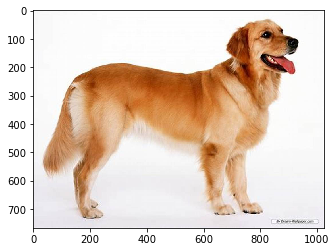

In [32]:
img=mpimg.imread(img_path)
imgplot = plt.imshow(img)

In [33]:
img = image.load_img(img_path, target_size=(255,255))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
prediction=model.predict(x)
print(prediction)

[[  4.17622971e-07]]
